In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [3]:
train_df = pd.read_csv('C:/Users/Богдан/Downloads/lab 5/mnist_train.csv',header=None)
#test_df = pd.read_csv('C:/Users/Богдан/Downloads/lab 5/mnist_test.csv',header=None)
x_train = train_df.drop(0,axis=1).values
x_train = x_train/255
y_train = train_df[0].values

#x_test = test_df.drop(0,axis=1).values
#x_test = x_test/255
#y_test = test_df[0].values

In [10]:
train_filter = np.unique(y_train, return_index=True)
#train_filter1 = np.unique(y_test, return_index=True)
X_train, Y_train = x_train[train_filter[1:]], y_train[train_filter[1:]]
#X_test, Y_test = x_test[train_filter1[1:]], y_test[train_filter1[1:]]

78400


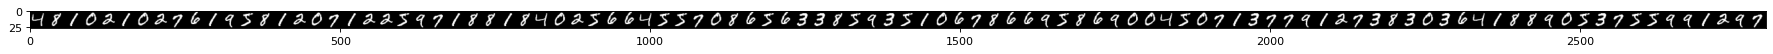

----------------


In [5]:
#ints_list = np.random.randint(0, 10, 100)

text_number = []
text_images = []
#text_number_test = []
#text_images_test = []
for _ in range(110):
    string_number = np.random.randint(0, 10, 100)
    #string_number_test = np.random.randint(0, 10, 100)
    string_image = X_train[string_number].reshape(100,1,28*28)
    #string_image_test = X_test[string_number_test].reshape(100,1,28*28)
    text_number.append(string_number)
    text_images.append(string_image)
    #text_number_test.append(string_number_test)
    #text_images_test.append(string_image_test)
    
targets = np.array(text_number)
images = np.array(text_images)
#targets_test = np.array(text_number_test)
#images_test = np.array(text_images_test)

figure(figsize=(28, 22), dpi=80)
print(images[15].size)
plt.imshow(np.concatenate(images[15].reshape(100,28,28),axis = 1),cmap = 'gray')
plt.show()
print("----------------")

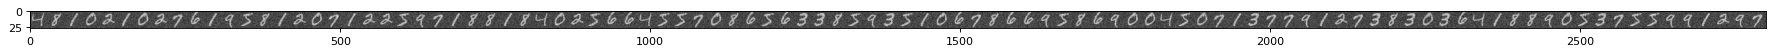

----------------


In [11]:
import numpy as np
import os
import cv2
def noisy(noise_typ,image):
    if noise_typ == "gauss":
      row, col, ch= image.shape
      mean = 0
      var = 0.02
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy

#noise_images_test = []    
noise_images = []
for image in images:
    image = noisy("gauss",image)
    noise_images.append(image)
    
#for image in images_test:
#    image = noisy("gauss",image)
#    noise_images_test.append(image)

noise_images = np.array(noise_images)
#noise_images_test = np.array(noise_images_test)
figure(figsize=(28, 22), dpi=80)
plt.imshow(np.concatenate(noise_images[15].reshape(100,28,28),axis = 1),cmap = 'gray')
plt.show()
print("----------------")

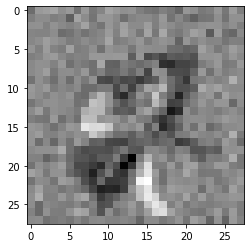

In [7]:
def perceptron(x,y,lambd):
    for k in range(len(lambd)):
        encoded_x = np.zeros(x.shape)
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if k == y[i][j]: 
                    encoded_x[i][j] = x[i][j]
                else:
                    encoded_x[i][j] = -x[i][j]

        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                if np.dot(lambd[k],encoded_x[i][j][0])<=0:  
                    lambd[k]+=encoded_x[i][j][0]
                    lambd = perceptron(x,y,lambd)
    return lambd

train_x, train_y = noise_images[:10],targets[:10]
test_x, test_y = noise_images[10:],targets[10:]
lambd = np.zeros((10,28*28))
lambd = perceptron(train_x,train_y,lambd)
for i in range(lambd.shape[0]):
    #print(i)
    lambd_kernel = lambd[i].reshape(28,28)
    plt.imshow(lambd_kernel,cmap = 'gray')
    plt.savefig(f'D:/lab5/result/result_{i}.png')
    #plt.show()

In [12]:
predicts = []
targets = []
for i in range(test_x.shape[0]):
    for j in range(test_x.shape[1]):
        target = test_y[i][j]
        targets.append(target)
        predict = np.zeros(10)
        for z in range(10):
            predict[z] = np.dot(lambd[z],test_x[i][j][0])
        predict = np.argmax(predict)
        predicts.append(predict)
        if predict!=target:
            print('Target = ',target, "Predicted = ",predict)
            plt.imshow(test_x[i][j][0].reshape(28,28),cmap = 'gray')
            plt.show()
            print('--------------------------------------------------------')

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(targets,predicts)

1.0